# Capstone 2 Data Wrangling

### Data Collection / Data Organization

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())
print(os.listdir())

C:\Users\filia\Springboard DS\Capstone 2\US Births 2018
['.ipynb_checkpoints', 'Capstone 2 Data Wrangling.ipynb', 'Column Label Def.pdf', 'US_births(2018).csv']


In [3]:
df = pd.read_csv('US_births(2018).csv')

C:\Users\filia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Data Definition

In [4]:
df.columns

Index(['ATTEND', 'BFACIL', 'BMI', 'CIG_0', 'DBWT', 'DLMP_MM', 'DLMP_YY',
       'DMAR', 'DOB_MM', 'DOB_TT', 'DOB_WK', 'DOB_YY', 'DWgt_R', 'FAGECOMB',
       'FEDUC', 'FHISPX', 'FRACE15', 'FRACE31', 'FRACE6', 'ILLB_R', 'ILOP_R',
       'ILP_R', 'IMP_SEX', 'IP_GON', 'LD_INDL', 'MAGER', 'MAGE_IMPFLG',
       'MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MM_AICU', 'MRACE15',
       'MRACE31', 'MRACEIMP', 'MRAVE6', 'MTRAN', 'M_Ht_In', 'NO_INFEC',
       'NO_MMORB', 'NO_RISKS', 'PAY', 'PAY_REC', 'PRECARE', 'PREVIS',
       'PRIORDEAD', 'PRIORLIVE', 'PRIORTERM', 'PWgt_R', 'RDMETH_REC',
       'RESTATUS', 'RF_CESAR', 'RF_CESARN', 'SEX', 'WTGAIN'],
      dtype='object')

In [5]:
feat_of_int = ['BMI', 
               'CIG_0', 
               'DBWT', 
               'DMAR', 
               'DOB_MM', 
               'DOB_TT', 
               'DOB_WK', 
               'DWgt_R',
               'MAGER',
               'MEDUC',
               'MHISPX',
               'MRAVE6',
               'M_Ht_In',
               'PRECARE',
               'PREVIS',
               'PWgt_R',
               'SEX',
               'WTGAIN'
              ]
df = df[feat_of_int]
df.shape

(3801534, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801534 entries, 0 to 3801533
Data columns (total 18 columns):
 #   Column   Dtype  
---  ------   -----  
 0   BMI      float64
 1   CIG_0    int64  
 2   DBWT     int64  
 3   DMAR     object 
 4   DOB_MM   int64  
 5   DOB_TT   int64  
 6   DOB_WK   int64  
 7   DWgt_R   int64  
 8   MAGER    int64  
 9   MEDUC    int64  
 10  MHISPX   int64  
 11  MRAVE6   int64  
 12  M_Ht_In  int64  
 13  PRECARE  int64  
 14  PREVIS   int64  
 15  PWgt_R   int64  
 16  SEX      object 
 17  WTGAIN   int64  
dtypes: float64(1), int64(15), object(2)
memory usage: 522.1+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,3801534.0,28.817006,12.723501,13.0,22.3,25.8,31.1,99.9
CIG_0,3801534.0,1.573716,8.244679,0.0,0.0,0.0,0.0,99.0
DBWT,3801534.0,3266.895145,619.442283,227.0,2960.0,3300.0,3629.0,9999.0
DOB_MM,3801534.0,6.560880,3.419287,1.0,4.0,7.0,9.0,12.0
DOB_TT,3801534.0,1229.176372,636.605763,0.0,759.0,1236.0,1733.0,9999.0
DOB_WK,3801534.0,4.059289,1.852540,1.0,3.0,4.0,6.0,7.0
DWgt_R,3801534.0,200.274442,105.995646,100.0,160.0,182.0,212.0,999.0
MAGER,3801534.0,29.009025,5.806026,12.0,25.0,29.0,33.0,50.0
MEDUC,3801534.0,4.412692,1.804158,1.0,3.0,4.0,6.0,9.0
MHISPX,3801534.0,0.649585,1.579992,0.0,0.0,0.0,0.0,9.0


In [8]:
''' No apperant nulls, however in actuallity the max values of 9 or several digits of 9,
are what the metadata depicted as missing/unknown values or nulls. '''
df.isnull().sum()

BMI        0
CIG_0      0
DBWT       0
DMAR       0
DOB_MM     0
DOB_TT     0
DOB_WK     0
DWgt_R     0
MAGER      0
MEDUC      0
MHISPX     0
MRAVE6     0
M_Ht_In    0
PRECARE    0
PREVIS     0
PWgt_R     0
SEX        0
WTGAIN     0
dtype: int64

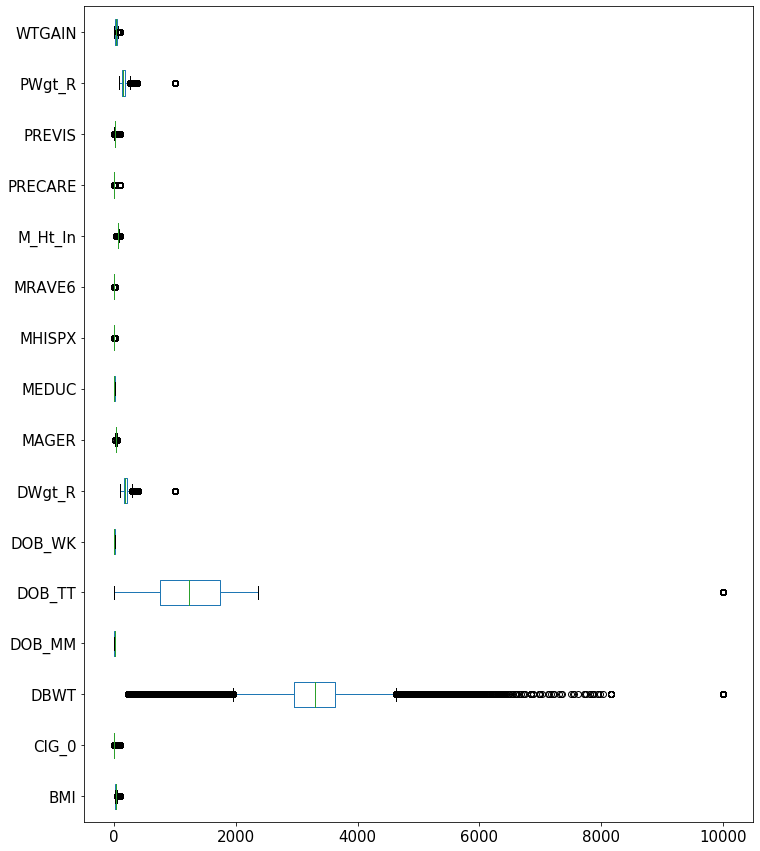

In [9]:
df.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))
plt.show()

### Data Cleaning
Note: Data appears to not have any null values but metadata reports null/unknown values are depicted by the number 9 or U in column values

         Percent_of_Nulls
WTGAIN           3.082650
PRECARE          2.516668
PREVIS           2.515221
BMI              2.267506
PWgt_R           2.013240
DWgt_R           1.474352
MEDUC            1.294793
MHISPX           0.895375
M_Ht_In          0.525604
CIG_0            0.477965
DBWT             0.077863
DOB_TT           0.008312


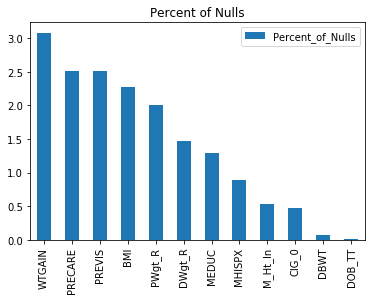

In [10]:
#Defined a function to extract null values from dataset and depict percentage of nulls within columns
find_nulls = ['BMI','CIG_0','DBWT','DOB_TT','DWgt_R','MEDUC','MHISPX','M_Ht_In','PRECARE','PREVIS','PWgt_R','WTGAIN']

def percent_of_null(lis):
    d = {}
    
    for col in lis:
        if col == 'BMI':
            null = df[df[col] == 99.9]
            p_of_null = (len(null)/len(df[col]))*100
            d[col] = [p_of_null]
        elif col in ['CIG_0', 'M_Ht_In','PRECARE','PREVIS','WTGAIN']:
            null = df[df[col] == 99]
            p_of_null = (len(null)/len(df[col]))*100
            d[col] = [p_of_null]
        elif col in ['DBWT', 'DOB_TT']:
            null = df[df[col] == 9999]
            p_of_null = (len(null)/len(df[col]))*100
            d[col] = [p_of_null]
        elif col in ['DWgt_R','PWgt_R']:
            null = df[df[col] == 999]
            p_of_null = (len(null)/len(df[col]))*100
            d[col] = [p_of_null]
        elif col in ['MEDUC','MHISPX']:
            null = df[df[col] == 9]
            p_of_null = (len(null)/len(df[col]))*100
            d[col] = [p_of_null]
 
    pNulls = pd.DataFrame(d).T
    pNulls.columns = ['Percent_of_Nulls']
    pNulls = pNulls.sort_values(by='Percent_of_Nulls', ascending=False)
    print(pNulls)
    pNulls.plot(kind='bar')
    plt.title('Percent of Nulls')
    plt.show()
    

percent_of_null(find_nulls)
#Percent of null values in each column is 3% or less

#### Explore only two features that are non-numeric for nulls, Marital Status (DMAR) and Sex of Infant (SEX)

In [11]:
#Expect values in DMAR column to be either 1 or 2, mixed dtypes of 1, 2 and even a blank
print(df['DMAR'].unique())
print(df['DMAR'].value_counts())

[1 2 '2' '1' ' ']
1    1994221
2    1332177
      456083
1      13801
2       5252
Name: DMAR, dtype: int64


In [12]:
#Blank is missing, values representing marital status are binary 1 and 2 ffill to fix blanks
df['DMAR'] = df.DMAR.replace(' ', method='ffill')
df['DMAR'] = pd.to_numeric(df.DMAR, errors='coerce')

print(df.DMAR.unique())
print(df.DMAR.value_counts())
print(df.DMAR.value_counts().sum())

[1 2]
1    2464105
2    1337429
Name: DMAR, dtype: int64
3801534


In [13]:
#Verify M F characters for SEX column
print(df.SEX.unique())
print(df.SEX.value_counts())
print(df.SEX.value_counts().sum())

['M' 'F']
M    1943273
F    1858261
Name: SEX, dtype: int64
3801534


#### Address the other numeric columns containing null values

In [14]:
#Replace the BMI null values with the mean of series since it's only 2%
df['BMI'] = df.BMI.replace(99.9, round(df.BMI.mean(),1))

In [15]:
#About 0.5% are nulls for CIG_0, replace with the majority of the values which is 0
df['CIG_0'] = df.CIG_0.replace(99, 0)

In [16]:
#Replaced birth weight (grams) with mean of series
df['DBWT'] = df.DBWT.replace(9999, int(df.DBWT.mean()))

In [17]:
#Replaced time of birth using ffill due to low % of nulls within column
df['DOB_TT'] = df.DOB_TT.replace(9999, method='ffill')

In [18]:
#Replaced mother's delivery weight (lbs) with forward fill
df['DWgt_R'] = df.DWgt_R.replace(999, method='ffill')

In [19]:
#Replaced education of mothers with forward fill
df['MEDUC'] = df.MEDUC.replace(9, method='ffill')

In [20]:
#Replaced mother's hispanic origin nulls to default value of 'other' 6
df['MHISPX'] = df.MHISPX.replace(9, 6)

In [21]:
#Replaced mother's height (inches) with mean of series
df['M_Ht_In'] = df.M_Ht_In.replace(99, int(df.M_Ht_In.mean()))

In [22]:
#Replaced month prenatal care began with forward fill
df['PRECARE'] = df.PRECARE.replace(99, method='ffill')

In [23]:
#Replaced number of prenatal visits with mean of series
df['PREVIS'] = df.PREVIS.replace(99, int(df.PREVIS.mean()))

In [24]:
#Replaced mother's pre-pregnancy weight (lbs) with forward fill
df['PWgt_R'] = df.PWgt_R.replace(999, method='ffill')

In [25]:
#Replaced weight gain by mother (lbs) with mean of series
df['WTGAIN'] = df.WTGAIN.replace(99, int(df.WTGAIN.mean()))

#### Drop duplicates and revised clean data

In [26]:
#Shape before dropping duplicates
print(df.shape)

#Drop duplicates
df = df.drop_duplicates()

#Shape after dropping duplicates
df.shape

(3801534, 18)


(3801375, 18)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,3801375.0,27.204790,6.686982,13.0,22.3,25.8,30.5,69.9
CIG_0,3801375.0,1.100540,4.732356,0.0,0.0,0.0,0.0,98.0
DBWT,3801375.0,3261.692771,590.203179,227.0,2960.0,3300.0,3629.0,8165.0
DMAR,3801375.0,1.351812,0.477536,1.0,1.0,1.0,2.0,2.0
DOB_MM,3801375.0,6.560860,3.419280,1.0,4.0,7.0,9.0,12.0
DOB_TT,3801375.0,1228.446688,631.596818,0.0,759.0,1236.0,1733.0,2359.0
DOB_WK,3801375.0,4.059298,1.852544,1.0,3.0,4.0,6.0,7.0
DWgt_R,3801375.0,188.321898,41.392555,100.0,159.0,181.0,210.0,400.0
MAGER,3801375.0,29.008985,5.806028,12.0,25.0,29.0,33.0,50.0
MEDUC,3801375.0,4.355859,1.737868,1.0,3.0,4.0,6.0,8.0


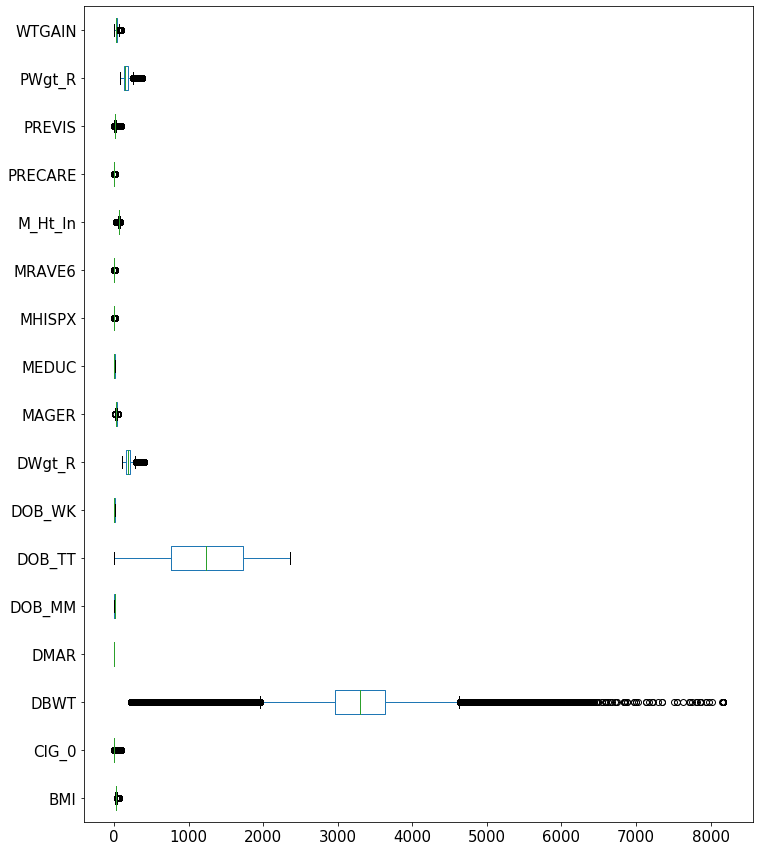

In [28]:
df.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))
plt.show()

### Export Data to CSV for EDA

In [29]:
df.to_csv('Cap2_Clean.csv')

In [30]:
os.listdir()

['.ipynb_checkpoints',
 'Cap2_Clean.csv',
 'Capstone 2 Data Wrangling.ipynb',
 'Column Label Def.pdf',
 'US_births(2018).csv']